# ZADANIE 2 (28.10.2024)
Zadanie polega na porównaniu wykładników skalowania w prawie Heapa dla różnych języków. W tym celu należy pobrać kilka (najlepiej więcej niż 10) pozycji występujących w dwóch językach (np. angielskim i francuskim), w każdym przypadku policzyć wykładnik β
 w prawie Heapa oraz wyznaczyć korelacje tak otrzymanych serii (np. scipy.stats. pearsonr), wraz z p
-wartością. Dodatkowo proszę sprawdzić jakie są wykładniki β
 w przypadku, gdy dokonamy losowego przetasowania słów w książkach (df.reshuffle() plus wypełnienie od zera position).

In [18]:
import tmtoolkit as tm

corp_en = tm.corpus.Corpus.from_folder('books/en/', language="en", load_features=[])
corp_fr = tm.corpus.Corpus.from_folder('books/fr/', language="fr", load_features=[])

### Heap law for different books

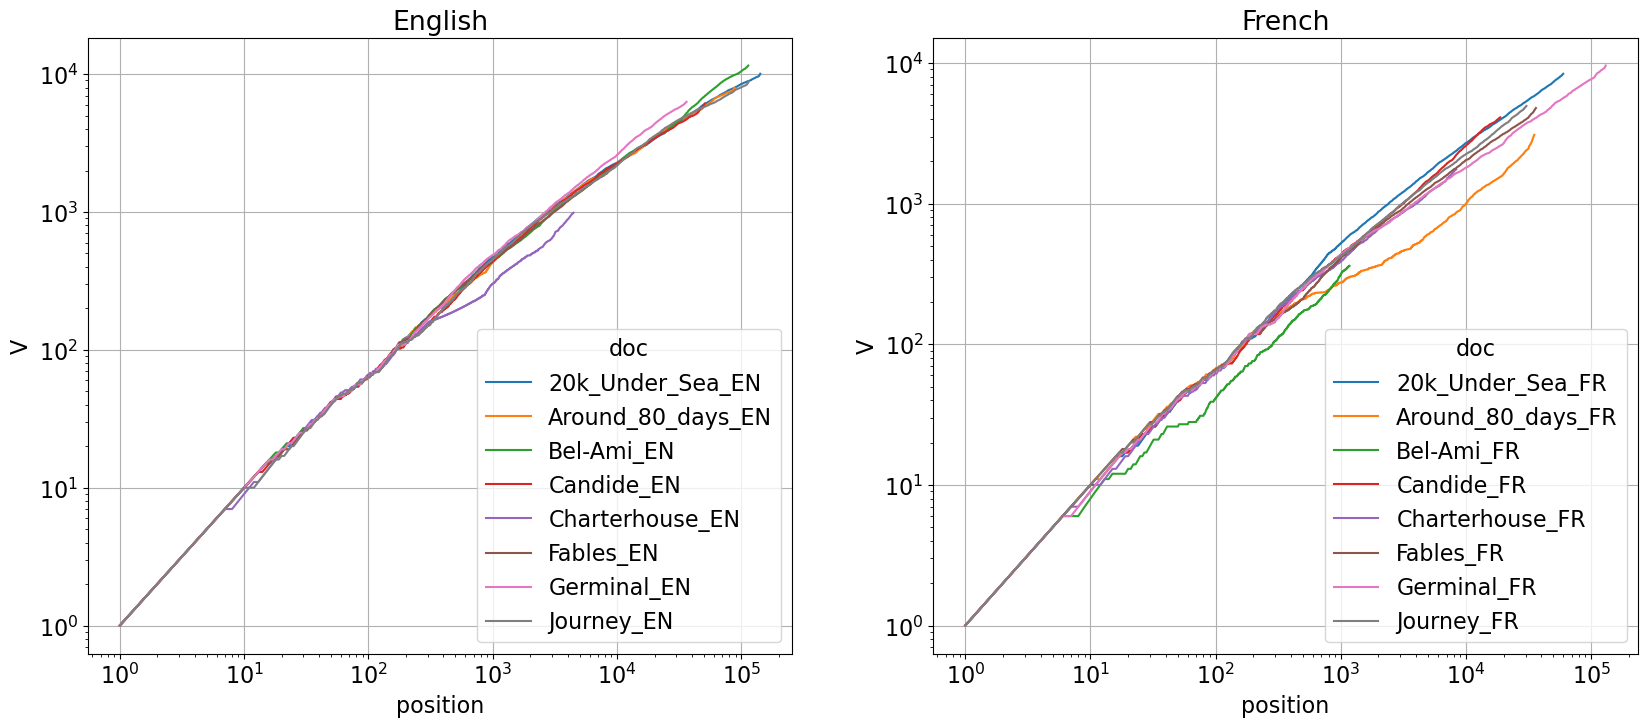

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16


plt.figure(figsize=(20, 8))
# English
heap_en:pd.DataFrame = tm.corpus.tokens_table(corp_en)

heap_en["V"] = ~heap_en.duplicated(subset = ["doc", "token"])
heap_en["position"] += 1
heap_en["V"] = heap_en.groupby("doc")["V"].cumsum()

plt.subplot(121)
sns.lineplot(heap_en, x = "position", y="V", hue = "doc")
plt.xscale('log')
plt.yscale('log')
plt.title("English")
plt.grid()

# French
heap_fr:pd.DataFrame = tm.corpus.tokens_table(corp_fr)

heap_fr["V"] = ~heap_fr.duplicated(subset = ["doc", "token"])
heap_fr["position"] += 1
heap_fr["V"] = heap_fr.groupby("doc")["V"].cumsum()

plt.subplot(122)
sns.lineplot(heap_fr, x = "position", y="V", hue = "doc")
plt.xscale('log')
plt.yscale('log')
plt.title("French")
plt.grid()

Pearson correlation for 20k_Under_Sea_EN (EN) and 20k_Under_Sea_FR (FR): r=1.000, p-value=0.000
Pearson correlation for Around_80_days_EN (EN) and Around_80_days_FR (FR): r=0.984, p-value=0.000
Pearson correlation for Bel-Ami_EN (EN) and Bel-Ami_FR (FR): r=0.991, p-value=0.000
Pearson correlation for Candide_EN (EN) and Candide_FR (FR): r=0.995, p-value=0.000
Pearson correlation for Charterhouse_EN (EN) and Charterhouse_FR (FR): r=0.987, p-value=0.000
Pearson correlation for Fables_EN (EN) and Fables_FR (FR): r=1.000, p-value=0.000
Pearson correlation for Germinal_EN (EN) and Germinal_FR (FR): r=0.998, p-value=0.000
Pearson correlation for Journey_EN (EN) and Journey_FR (FR): r=0.999, p-value=0.000


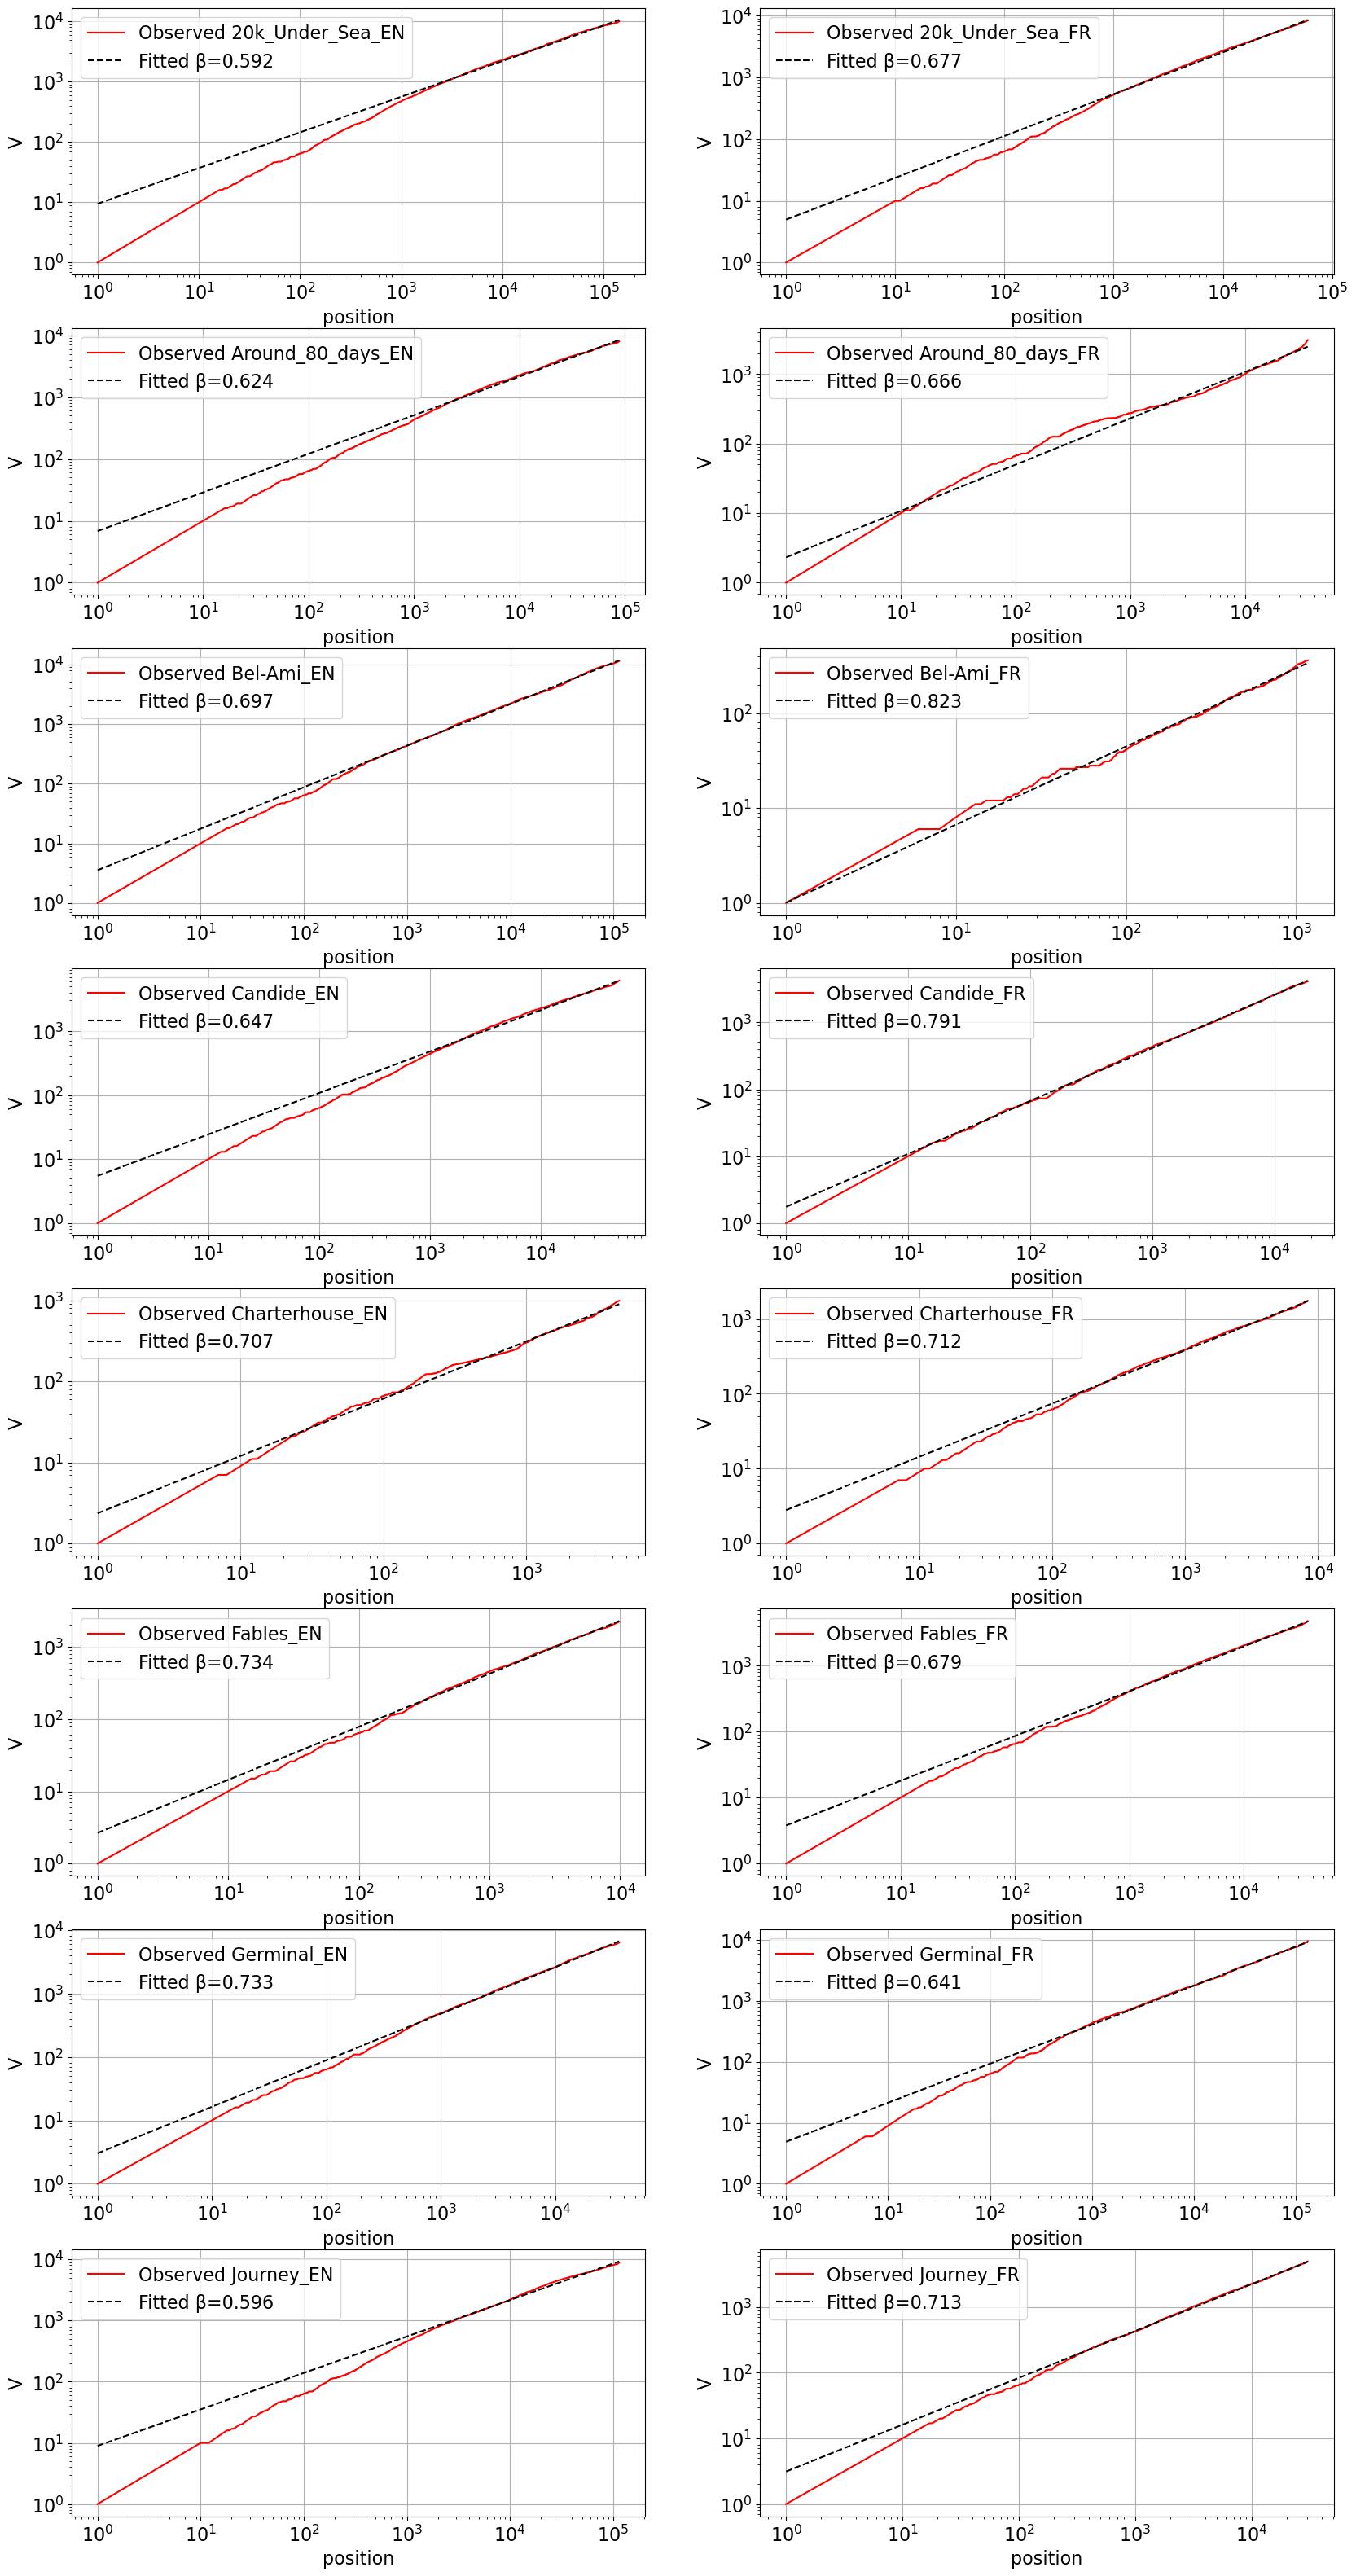

In [95]:
import statsmodels.formula.api as sm
from scipy.stats import pearsonr

N = len(heap_en['doc'].unique())
heaps=[heap_en, heap_fr]
i=1
plt.figure(figsize=(20, 40))

for title in zip(heap_en['doc'].unique(), heap_fr['doc'].unique()):
    for doc, heap in zip(title, heaps):
        model = sm.ols("np.log10(V)~np.log10(position)", data = heap[heap.doc==doc]).fit()
        B, beta = model.params

        x = np.logspace(np.log10(1), np.log10(heap[heap.doc==doc].max()["position"]), 100)
        y = 10**B*x**beta
        
        plt.subplot(N, 2, i)
        sns.lineplot(heap[heap.doc==doc], x = "position", y="V", color = "red", label=f"Observed {doc}")
        plt.plot(x, y, "--", color = "black", label=f"Fitted β={beta:.3f}")
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.grid()
        i+=1
    
    heap_en_doc = heap_en[heap_en.doc == title[0]].rename(columns={'V': 'V_en'})
    heap_fr_doc = heap_fr[heap_fr.doc == title[1]].rename(columns={'V': 'V_fr'})
    merged = pd.merge(heap_en_doc, heap_fr_doc, on="position", how="inner")
    # Calculate Pearson correlation for the paired documents
    if not merged.empty:  # Ensure there is data to compare
        r, p_value = pearsonr(merged['V_en'], merged['V_fr'])
        print(f"Pearson correlation for {title[0]} (EN) and {title[1]} (FR): r={r:.3f}, p-value={p_value:.3f}")


### Reshuffled

Przetasowanie słów w książce nie będzie miało wpływu na prawo Heapa ponieważ korzysta ono z modelu BoW (Bag of Words), który nie zależy od kolejności tokenów w dokumencie.

In [ ]:
def reshuffle_heap(heap):
    reshuffled = []
    for doc in heap['doc'].unique():
        # Przefiltruj dane dla dokumentu, przetasuj i zresetuj indeksy
        shuffled = heap[heap['doc'] == doc].sample(frac=1, random_state=42).reset_index(drop=True)
        shuffled['position'] = np.arange(1, len(shuffled) + 1)  # Zresetuj pozycje od 1
        reshuffled.append(shuffled)
    return pd.concat(reshuffled, ignore_index=True)

heap_en_reshuffled = reshuffle_heap(heap_en)
heap_en_reshuffled["V"] = heap_en_reshuffled.groupby("doc")["V"].cumsum()
heap_fr_reshuffled = reshuffle_heap(heap_fr)
heap_fr_reshuffled["V"] = heap_fr_reshuffled.groupby("doc")["V"].cumsum()


Pearson correlation for 20k_Under_Sea_EN (EN) and 20k_Under_Sea_FR (FR): r=0.005, p-value=0.259
Pearson correlation for Around_80_days_EN (EN) and Around_80_days_FR (FR): r=0.001, p-value=0.878
Pearson correlation for Bel-Ami_EN (EN) and Bel-Ami_FR (FR): r=-0.046, p-value=0.113
Pearson correlation for Candide_EN (EN) and Candide_FR (FR): r=0.007, p-value=0.333
Pearson correlation for Charterhouse_EN (EN) and Charterhouse_FR (FR): r=0.008, p-value=0.592
Pearson correlation for Fables_EN (EN) and Fables_FR (FR): r=0.013, p-value=0.189
Pearson correlation for Germinal_EN (EN) and Germinal_FR (FR): r=0.006, p-value=0.257
Pearson correlation for Journey_EN (EN) and Journey_FR (FR): r=0.001, p-value=0.899


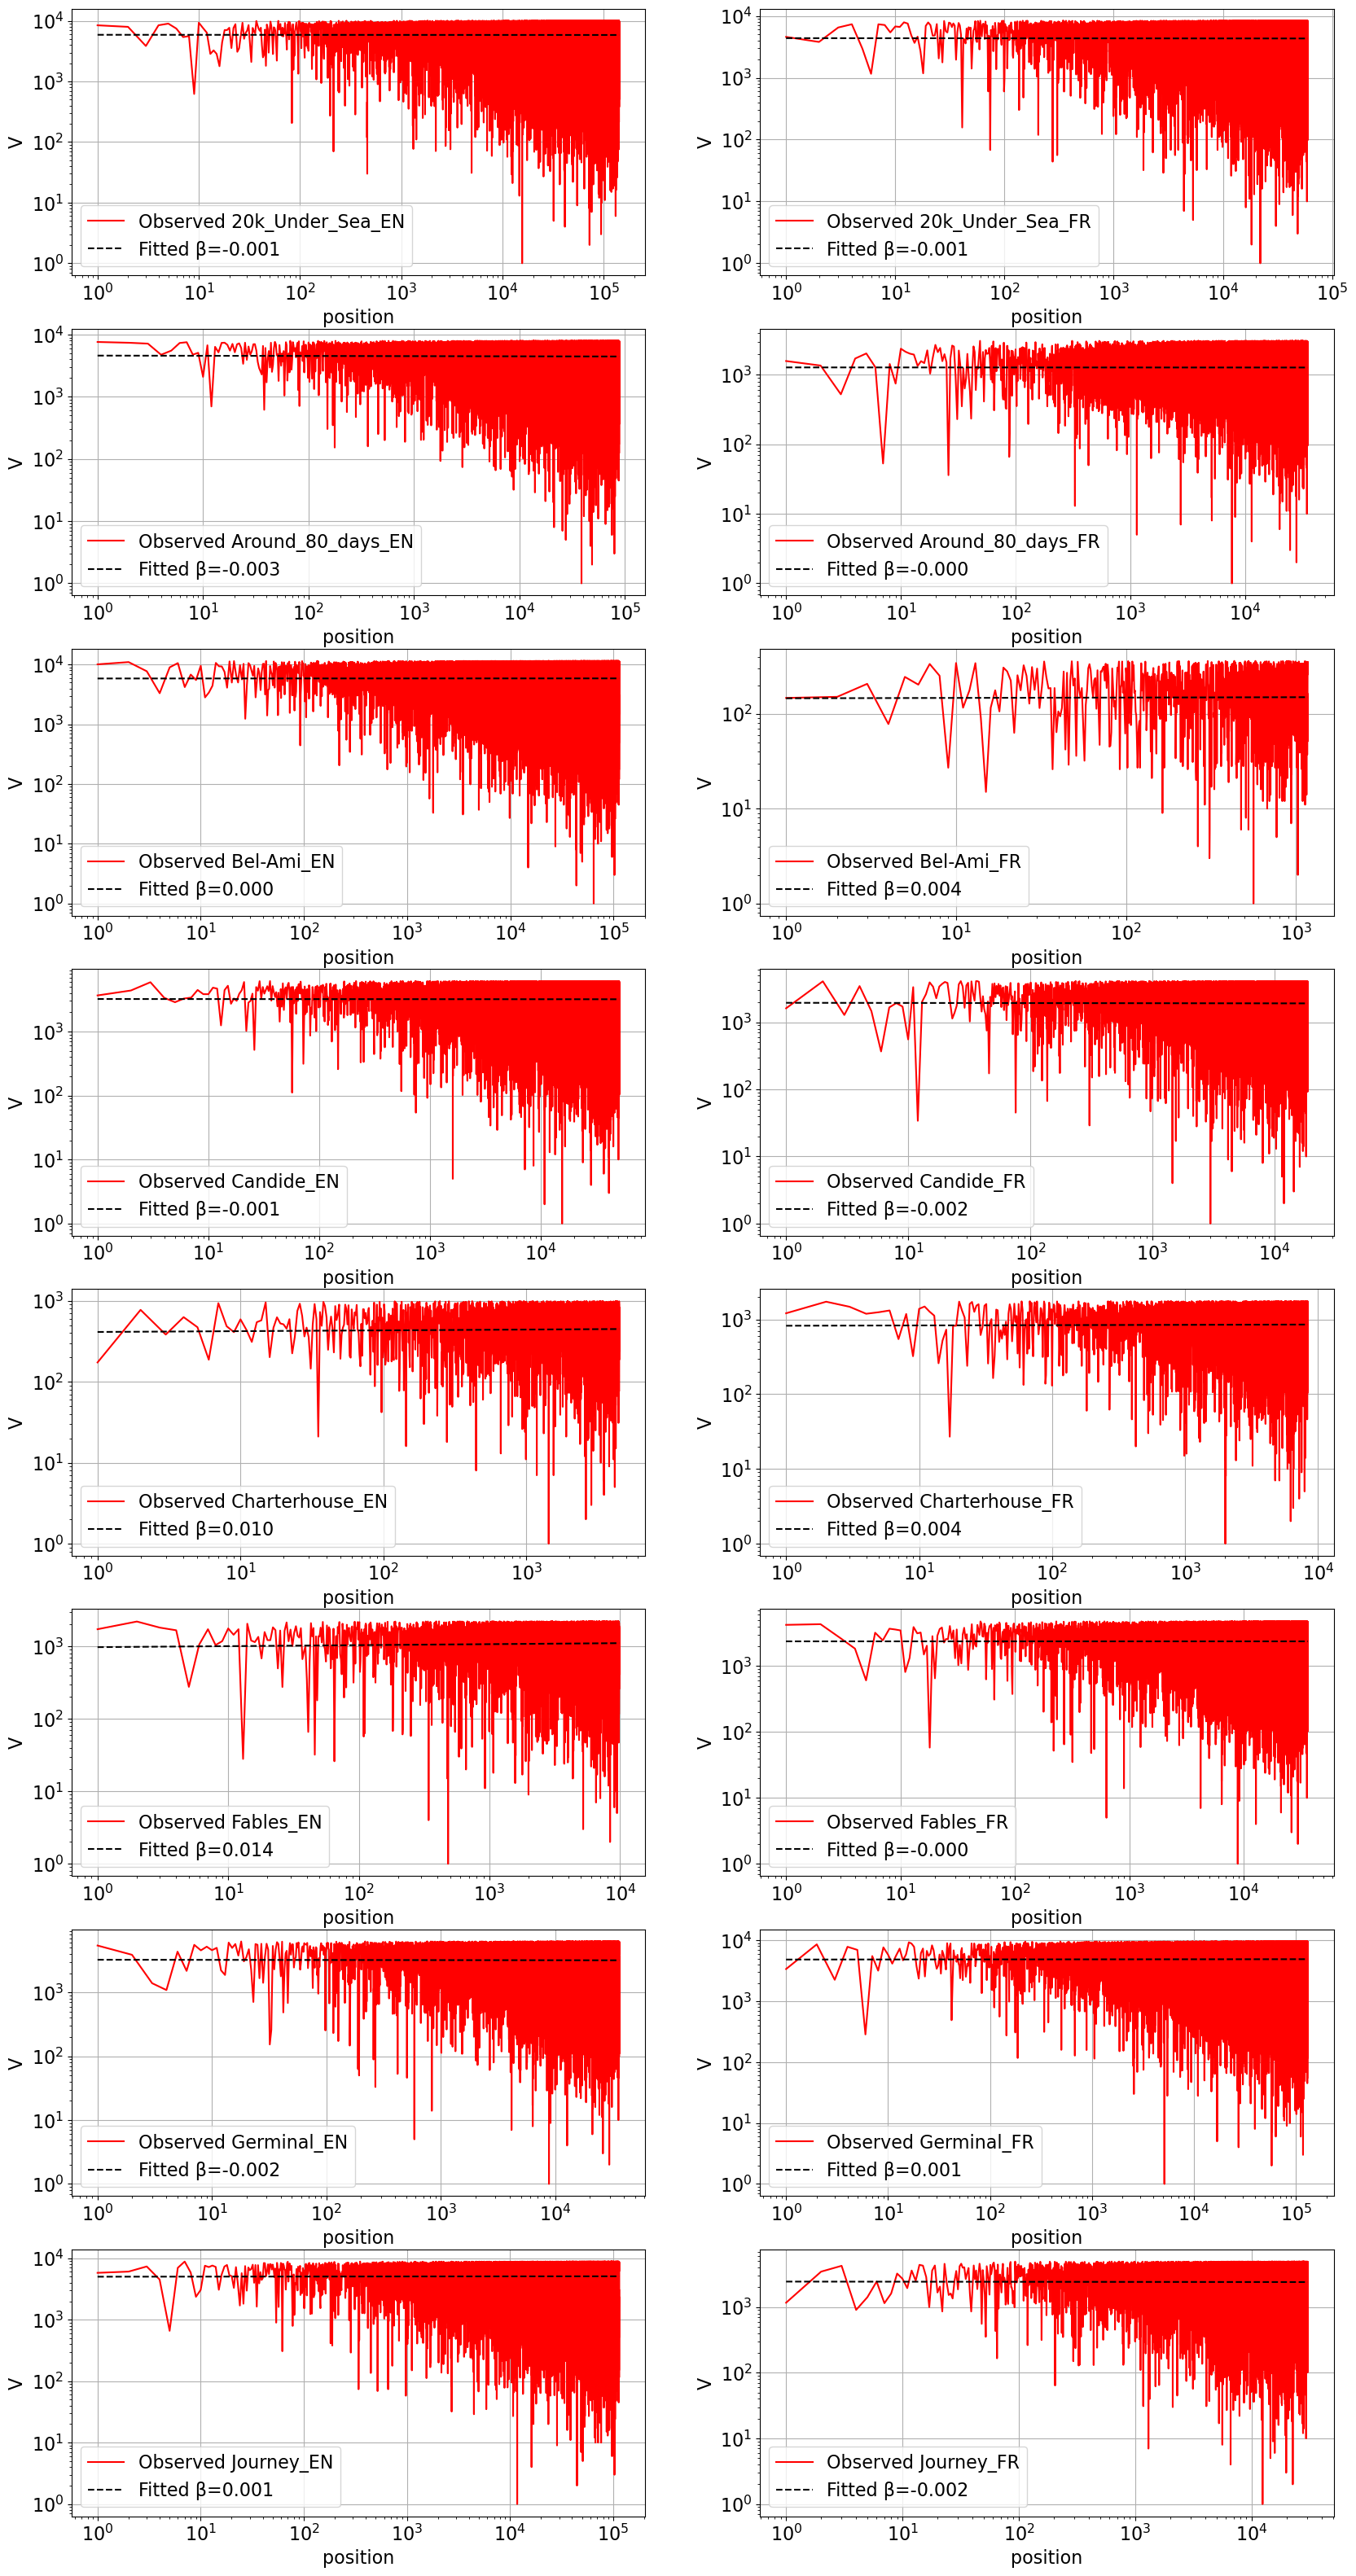

In [123]:
import statsmodels.formula.api as sm
from scipy.stats import pearsonr

N = len(heap_en['doc'].unique())
heaps=[heap_en_reshuffled, heap_fr_reshuffled]
i=1
plt.figure(figsize=(20, 40))

for title in zip(heap_en['doc'].unique(), heap_fr['doc'].unique()):
    for doc, heap in zip(title, heaps):
        model = sm.ols("np.log10(V)~np.log10(position)", data = heap[heap.doc==doc]).fit()
        B, beta = model.params

        x = np.logspace(np.log10(1), np.log10(heap[heap.doc==doc].max()["position"]), 100)
        y = 10**B*x**beta
        
        plt.subplot(N, 2, i)
        sns.lineplot(heap[heap.doc==doc], x = "position", y="V", color = "red", label=f"Observed {doc}")
        plt.plot(x, y, "--", color = "black", label=f"Fitted β={beta:.3f}")
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.grid()
        i+=1
    
    heap_en_doc = heap_en_reshuffled[heap_en_reshuffled.doc == title[0]].rename(columns={'V': 'V_en'})
    heap_fr_doc = heap_fr_reshuffled[heap_fr_reshuffled.doc == title[1]].rename(columns={'V': 'V_fr'})
    merged = pd.merge(heap_en_doc, heap_fr_doc, on="position", how="inner")
    # Calculate Pearson correlation for the paired documents
    if not merged.empty:  # Ensure there is data to compare
        r, p_value = pearsonr(merged['V_en'], merged['V_fr'])
        print(f"Pearson correlation for {title[0]} (EN) and {title[1]} (FR): r={r:.3f}, p-value={p_value:.3f}")
